# Temporal Clustering of Aggregated PHQ-9 Scores Using Coefficient of Variation (CV) on Sample Patient Set
----------------------------------------------------------------------------------------------------------------------

## Problem Statement : 
------------------------------


- The aim of this analysis is to detect significant changes in the Aggregated Patient Health Questionaire-9 (PHQ-9) scores across 365 days using the ***Coefficient of Variation (CV) as the aggregated statistic***. The sample dataset comprises 100 patients identified by unique patient IDs, with each patient's PHQ-9 score recorded for 50 randomly selected days amongst the total 365 days of a year. Also, each and every patients' are not attempting this survey everyday, rather at most they attempts the survey 6 times during 365 days span. So, scores of them are sparsed as well. 


### Context :
--------------

- Patient Health Questionnaire-9 (PHQ-9) is a multipurpose instrument used for diagnosis, scrrening, monitoring and measuring the severity of depression. The PHQ-9 is a self-report tool and incorporates DSM-IV depression diagnositics criteria along with other leading major depressive symptoms. The PHQ-9 uses the frequency of the symptoms which factor into the scoring severity index. 

- The PHQ-9 also has a clinical utility factor. Since it is a brief tool it is widely used in clinical practice. In a clinical setting, the questionnaire is quickly completed by the patient and then briefly scored by a clinician. The Patient Health Questionnaire (PHQ-9) can also be administered repeatedly, which helps clinicians in tracking improvement or regression of the depressive state of the patient. The PHQ-9 scores of 5, 10, 15, and 20 represent mild, moderate, moderately severe, and severe depression respectably.

- Patient Health Questionaire-9 (PHQ-9) is a widely used depression assesment tool that quantifies the severity of depressive symptoms. Understanding the temporal patterns of aggregated PHQ-9 scores, ***represnted by the aggregated statistic, Coefficient of Variation (CV) of each day across all patient's who have attempted the survey on that day***; can provide valuable insights into the overall mental helath & recovery trends of the patient population over a span of time; for a particular clinic or treatment procedures being used. 

- Identifying change points in the PHQ-9 scores aggregated by each day's Coefficient of Variation for the existing patients' score; can help one to recognize critical shifts or transitions in depression levels, enabling timely intervention and personalized patient care. 


### Dataset Description :
--------------------------

- The dataset consists of 100 rows each representing a unique patient ID, and 50 columns representing discrete days. Each cell in the dataset contains the PHQ-9 score of a specific patient on a particular day. The PHQ-9 scores are recorded on a continuous scale ranging from 0 to 27, reflecting the patient's depression severity of depressive symptoms. It is important to note that not all patients respond to the surveys every day, resulting in missing data, represented by NaN values, for certain days. The data is time-stamped, hence allows to track changes in depression levels over the course of 365 days. 

> ***Data Types*** : The PHQ-9 scores are represented as integer values, falling within the range from 0 to 27. The patient IDs and day numbers are typically stored as alphanumeric characters. 


### Objective : 
----------------

- The primary objective of this analysis is to detect significant shift/change points in the aggregated PHQ-9 scores, represented by CV, over the 365-day time frame. 

- A change point represents a critical time point at which a substantial shift occurs in the overall depression levels of the patient population. By identifying such change points, one can aim to uncover potential patterns, trends, or triggers that may be indicative of underlying factors affecting mental health. 


### Approach :
----------------

- To achieve the objective, the following steps are need to be followed :

> 1) Preprocess the dataset and compute the Coefficient of Variation for each day across all the patients who have attempted the PHQ-9 survey on that day.

> 2) Then some Exploratory Data Analysis (EDA) would be done on the raw dataset, as well as the aggregated statistic for understanding the inherent characteristics and underlying distributional properties of the sample.

> 3) Pruned Exact Linear Time (PELT) algorithm along with Least Absolute Shrinkage And Selection Operator (LASSO) loss normalization / L1 normalization would be used, to detect the change / break points using the aggregated Coefficient of Variation (CV) values for all the sample days. 

> 4) The analysis will involve visualizing the detected change points on the plot to gain actionable insights.


### Why Coefficient of Variation:
----------------------------------

***The Coefficient of Variation (CV) calculated as the ratio of Standard Deviation to the Mean (the relative dispersion of data points around the mean, i.e. CV = S.D / Mean ) is a powerful aggregated statistic in this context for several reasons:***

- [x] ***Handling Heterogeneity :*** In mental health studies, individual patients may have diverse baseline PHQ-9 scores and variability in their depression severity. The CV takes into account both the Mean & Standard Deviation, making it well-suited for handling heterogeneity in the patient population.


- [x] ***Capturing Relative Variability :*** Unlike using the Standard Deviation solely, which may not be directly comparable to the Mean, the CV expresses the Standard Deviation as a percentage of the Mean. This allows to capture the relative variability of PHQ-9 scores, providing a normalized measure of variation across different time points.


- [x] ***Interpretability :*** The CV offers a more intuitive measure of dispersion compared to other statistics like Standard Deviation, Range, Quartile Deviation etc. as it relates variability to the magnitude of the Mean. A higher CV signifies larger relative fluctuations, potentially indicating periods of increaed instability in depression severity. 


- [x] ***Robustness to Outliers :*** The CV is relatively robust to the influence of extreme values (outliers) that might exist in the PHQ-9 scores. It provides a measure of variation that is less affected by extreme values, ensuring a more reliable representation of overall variability. 


- The aim of using the CV as the aggregated statistic, is to capture the collective variability of PHQ-9 scores across time and identify change points that reflect meaningful shifts in the overall depression levels of the patient population. The computed CV values would be served as a crucial basis for applying the Pruned Exact Linear Time (PELT) algorithm with LASSO Loss Normalization to detect significant change points. 


### Expected Outcome :
--------------------------

- The analysis would yield a set of identified change points in the aggregated CV scores, indicating periods when significant shifts/changes in depression level occured across the patient sample. 

- These results would provide a valuable understanding of the temporal dynamics of depression severity, as captured by the Coefficient of Variation (CV), helping healthcare professionals and decision-makersn to better address mental health challenges, tailor interventions, and enhance overall patient well-being. 

- The goal of this whole analysis process is to support & extract insights concerned for evidence-based decision-making and contribute to improving mental health care strategies by identifying critical change points in the aggregated PHQ-9 scores, represented by the Coefficient of Variation (CV), across time. 

# Data Analysis & Model Building

## Dependencies


In [1]:
import warnings
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import ruptures as rpt
import matplotlib.pyplot as plt
from IPython.display import display_html

warnings.filterwarnings('ignore')

## Load the Sample Dataset

In [2]:
# read data
data = pd.read_csv('../data/PHQ_9_sample_dataset.csv', index_col='Day').T


In [3]:
display(data.head(10))

Day,Day_2,Day_3,Day_6,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,...,Day_149,Day_150,Day_158,Day_163,Day_213,Day_218,Day_219,Day_268,Day_280,Day_364
Patient_1,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_2,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,NaN
Patient_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_4,15.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Patient_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
Patient_6,NaN,15.0,13.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Patient_7,NaN,NaN,12.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Patient_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
Patient_9,NaN,NaN,17.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(data.tail(10))

Day,Day_2,Day_3,Day_6,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,...,Day_149,Day_150,Day_158,Day_163,Day_213,Day_218,Day_219,Day_268,Day_280,Day_364
Patient_91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_93,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Patient_94,NaN,NaN,NaN,NaN,NaN,15.0,NaN,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Patient_96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
Patient_97,NaN,NaN,NaN,NaN,NaN,18.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
Patient_98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Patient_99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient_100,NaN,17.0,NaN,NaN,18.0,NaN,7.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

### A) Summary Statistics : Across Different Levels

In [5]:
summary_statistics_across_days     = data.describe().T
summary_statistics_across_patients = data.T.describe().T


In [6]:
# Showing Results in two parts : Head & Tail
df1_styler = summary_statistics_across_days.head(25).style.set_table_attributes("style='display:inline'")\
             .set_caption('Head-25')
df2_styler = summary_statistics_across_days.tail(25).style.set_table_attributes("style='display:inline'")\
             .set_caption('Tail-25')
space      = "\xa0" * 25
display_html(df1_styler._repr_html_()+space+df2_styler._repr_html_(), raw=True)


,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
Day_2,12.000000,14.000000,3.190896,10.000000,11.750000,14.000000,15.250000,22.000000
Day_3,15.000000,14.266667,3.494213,10.000000,11.000000,15.000000,16.500000,21.000000
Day_6,17.000000,13.705882,2.365500,11.000000,12.000000,13.000000,15.000000,18.000000
Day_8,18.000000,15.333333,2.656845,11.000000,13.500000,16.000000,17.000000,19.000000
Day_9,12.000000,15.833333,2.552479,12.000000,14.750000,15.000000,18.250000,19.000000
Day_10,16.000000,15.312500,2.625992,11.000000,13.750000,15.000000,17.250000,19.000000
Day_11,11.000000,8.363636,3.170890,5.000000,6.500000,7.000000,11.000000,13.000000
Day_12,14.000000,7.928571,2.585887,5.000000,6.250000,7.000000,9.000000,14.000000
Day_13,14.000000,8.642857,3.607836,5.000000,6.000000,8.000000,10.000000,17.000000


In [7]:
# Showing Results in two parts : Head & Tail
df3_styler = summary_statistics_across_patients.head(50).style.set_table_attributes("style='display:inline'")\
             .set_caption('Head-50')
df4_styler = summary_statistics_across_patients.tail(50).style.set_table_attributes("style='display:inline'")\
             .set_caption('Tail-50')
space      = "\xa0" * 25
display_html(df3_styler._repr_html_()+space+df4_styler._repr_html_(), raw=True)


,count,mean,std,min,25%,50%,75%,max
Patient_1,6.000000,7.333333,7.004760,1.000000,2.250000,5.000000,10.750000,19.000000
Patient_2,5.000000,4.600000,6.542171,0.000000,1.000000,2.000000,4.000000,16.000000
Patient_3,6.000000,4.666667,4.131182,0.000000,1.250000,4.500000,8.500000,9.000000
Patient_4,6.000000,6.666667,7.527727,0.000000,0.000000,5.000000,13.750000,15.000000
Patient_5,6.000000,3.166667,2.316607,0.000000,1.500000,3.500000,4.750000,6.000000
Patient_6,6.000000,7.666667,8.140434,0.000000,0.250000,7.000000,14.500000,17.000000
Patient_7,6.000000,8.333333,6.345602,0.000000,4.250000,8.500000,12.000000,17.000000
Patient_8,5.000000,2.600000,4.335897,0.000000,0.000000,0.000000,3.000000,10.000000
Patient_9,5.000000,8.000000,9.300538,0.000000,0.000000,4.000000,17.000000,19.000000
Patient_10,6.000000,3.000000,2.097618,1.000000,1.250000,2.500000,4.500000,6.000000


### B) Visualizations

#### 1. Bar Chart for daily Respopnsive and Non-Responsive percentage of patients

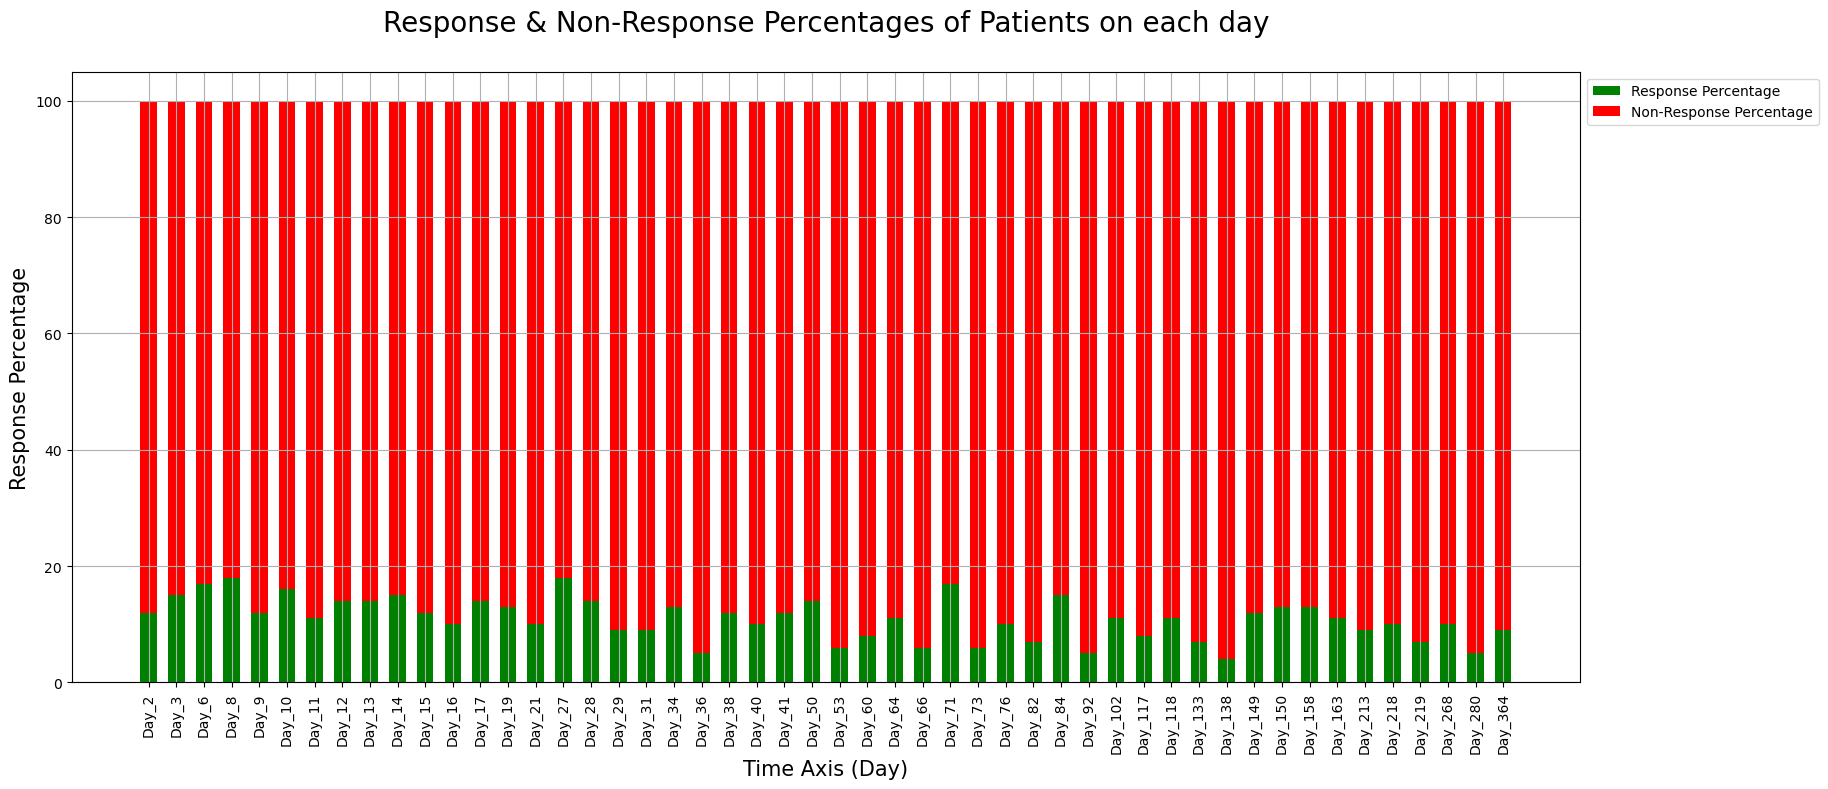

In [8]:
# Response and non-response counts for each day
total_patients          = len(data)
non_response_counts     = data.isna().sum(axis=0)
response_counts         = (total_patients - non_response_counts)

# Response and non-response percentage for each day
response_percentage     = (response_counts / total_patients) * 100
non_response_percentage = (non_response_counts / total_patients) * 100

# Stacked Bar Diagram
x_axis_values           = data.columns # Days on x-axis
fixed_width             = 0.6
fig, ax                 = plt.subplots(figsize = (16, 8))

# Stacked bar chart for Response and non-response percentages
ax.bar(x      = x_axis_values,
       height = response_percentage,
       width  = fixed_width, 
       label  = 'Response Percentage',
       color  = 'green')

ax.bar(x      = x_axis_values,
       height = non_response_percentage,
       width  = fixed_width,
       bottom = response_percentage, 
       label  = 'Non-Response Percentage',
       color  = 'red')

# Decorators
ax.set_xlabel(xlabel   = 'Time Axis (Day)',
              fontsize = 15)

ax.set_ylabel(ylabel   = 'Response Percentage', 
              fontsize = 15)

ax.set_title(label    = 'Response & Non-Response Percentages of Patients on each day\n',
             fontsize = 20)

plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(True)
        
plt.legend(bbox_to_anchor = (1.00, 1.00),
           loc            = 'upper left',
           prop           = {'size': 10})

plt.show()

From the above plot of Responsive vs non-responsive percentage of patients over time, 2 things are clearly visible:
    
> 1) At the starting days, percentage of responsive patients are higher and it's declining over the time.

> 2) At the begining, percentage of responsive and non-responsive patients were bit stable (moving from day-2 through day-28 i.e. during first month of treatment), but after that the percentage fluctuates a lot.

#### 2. Average PHQ-9 Score Over Time (Days) Across All Patients

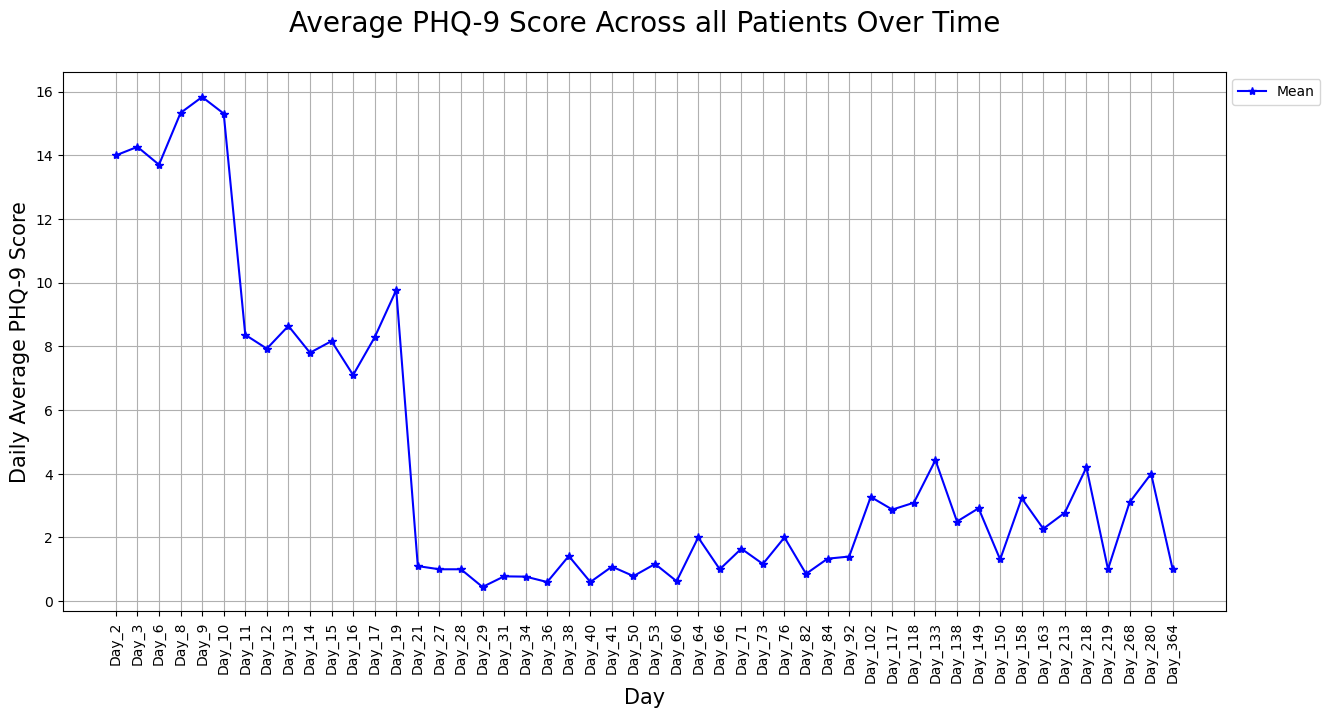

In [9]:
# Average PHQ-9 score across patients for each day
mean_values = data.apply(lambda x: np.nanmean(x), axis=0)

# Line Plot for average score across all patients over time
plt.figure(figsize=(15, 7))
plt.plot(mean_values.index,
         mean_values.values,
         label  = 'Mean',
         c      = 'blue',
         marker = '*')

plt.xlabel(xlabel   = 'Day',
           fontsize = 15)

plt.ylabel(ylabel   = 'Daily Average PHQ-9 Score',
           fontsize = 15)

plt.xticks(ticks    = np.arange(0, len(mean_values), 1),
           labels   = mean_values.index,
           rotation = 90)

plt.title(label    = 'Average PHQ-9 Score Across all Patients Over Time\n',
          fontsize = 20)

plt.legend(bbox_to_anchor = (1.00, 1.00),
           loc            = 'upper left',
           prop           = {'size': 10})

plt.grid(True)
plt.show()


From the above plot of the Daily Mean/Daily Averages of PHQ-9 scores over the time, going through day-2 to day-364; it can be clearly seen that:

> 1) The daily Mean was highest at the begining from Day-2 to Day-10, i.e. at the begining of treatment from the responses of the PHQ-9 obtained across patients, it has been seen that the Depression Level was higher. 

> 2) From Day-11 to Day-19, again the daily mean is showing a different pattern, which indicates the improvement of Depression Level by the treatment across the respondent patients.

> 3) After that, from Day-21 to Day-92, again a different pattern is visible, which is also showing the fluctuating yet lower average score than the starting, which indicates again the improvement of the Depression Levels across patients.

> 4) At the end, i.e Day-102 to Day-364, the pattern of daily Mean of PHQ-9 scores fluctuating a lot, which may be for different reasons which could be found by the further analysis. 


#### 3. Variation / Scatterness of the PHQ-9 scores across all the patients' over time (Days)

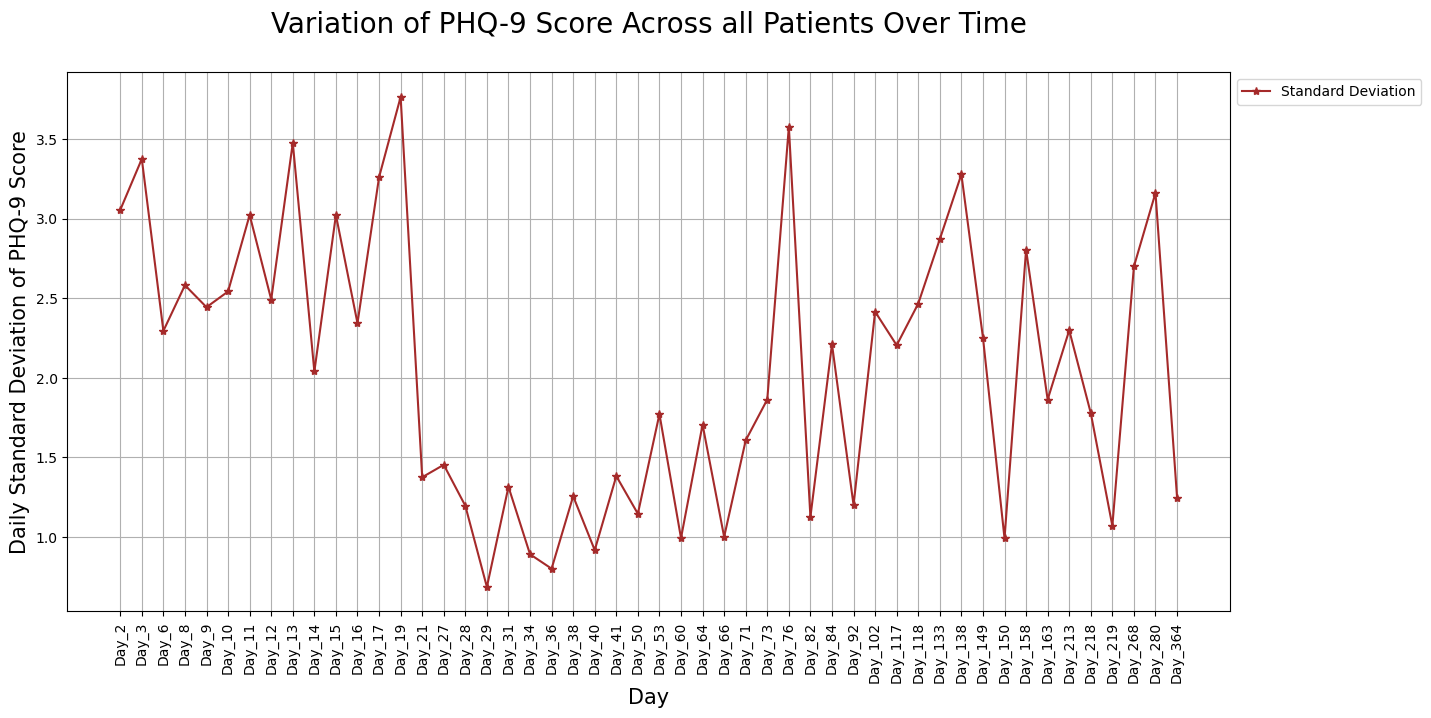

In [10]:
# Standard Deviation of PHQ-9 score across all patients for each day
std_values = data.apply(lambda y: np.nanstd(y), axis=0)

# Line Plot for average score across all patients over time
plt.figure(figsize=(15, 7))
plt.plot(std_values.index,
         std_values.values,
         label  = 'Standard Deviation',
         c      = 'brown',
         marker = '*')

plt.xlabel(xlabel   = 'Day',
           fontsize = 15)

plt.ylabel(ylabel   = 'Daily Standard Deviation of PHQ-9 Score',
           fontsize = 15)

plt.xticks(ticks    = np.arange(0, len(mean_values), 1),
           labels   = mean_values.index,
           rotation = 90)

plt.title(label    = 'Variation of PHQ-9 Score Across all Patients Over Time\n',
          fontsize = 20)

plt.legend(bbox_to_anchor = (1.00, 1.00),
           loc            = 'upper left',
           prop           = {'size': 10})

plt.grid(True)
plt.show()


From the above line plot of the Standard Deviations of PHQ-9 scores across all 100 patients, over the time; following things could be stated:

> 1) At the begining of the treatments, i.e. from Day-2 to Day-19, the variations were high and were fluctuating also within a small range; which is an indication of the effect of the treatment on the patients are different. 

> 2) Then from Day-21 to Day-73, the variation suddenly drops and showing a fluctuating trend over the time and the range of fluctuation is even smaller than the starting period, which indicates that the treatment has somewhat different effect on different patients but not much different. 

> 3) After that from Day-76 to Day 364, again the variation is fluctuating rapidly, which may indicate the effect of the treatment has again been fluctuating across patients, after their releases from the clicnic or maybe they have discontinued the treatment or something else, which would be subject of interest in the further analysis.


#### 4. Coefficeint of Variation (CV) of the PHQ-9 scores across all the patients' over time (Days)

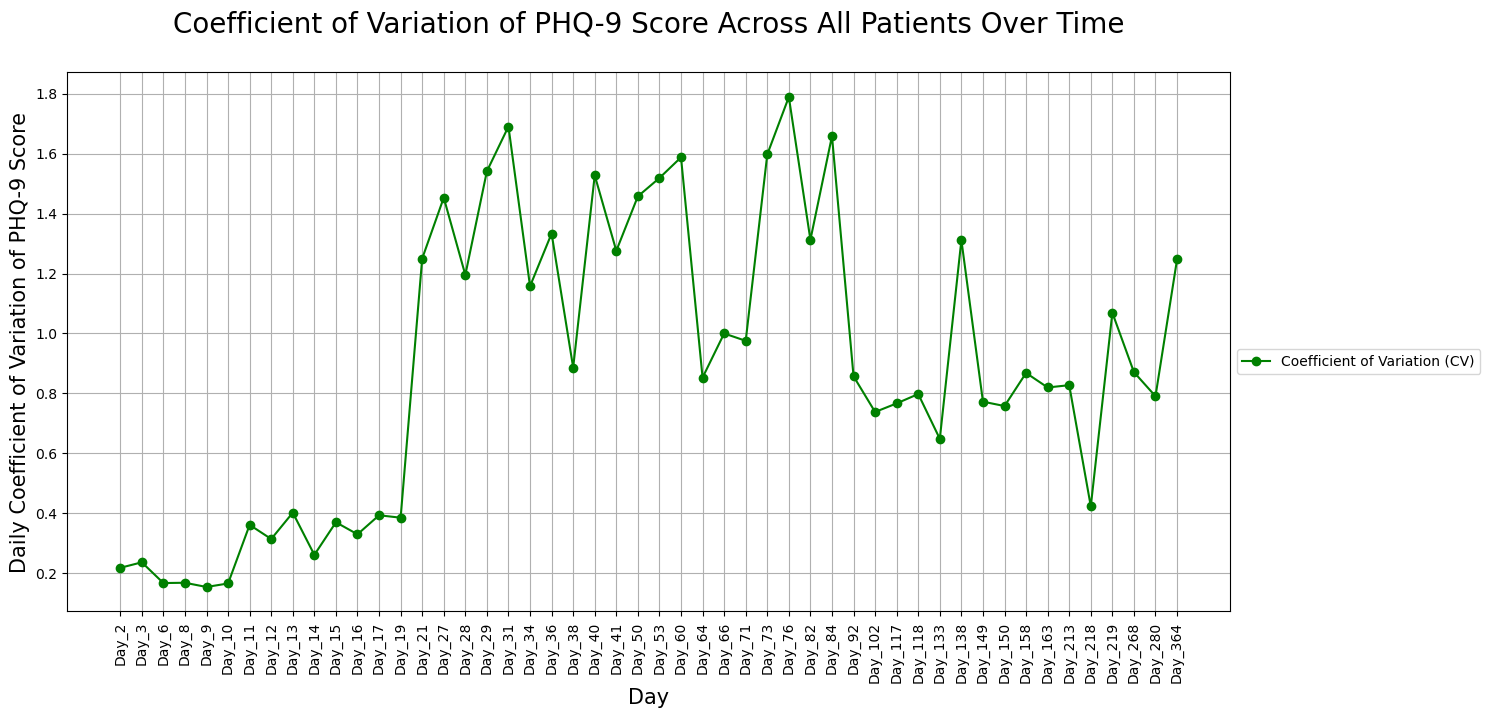

In [11]:
# The Coefficient of Variation (CV) for each day across all the 100 patients
cv_values = data.apply(lambda x: np.nanstd(x) / np.nanmean(x), axis=0)

plt.figure(figsize = (15, 7))
plt.plot(cv_values.index, 
         cv_values.values, 
         label  = 'Coefficient of Variation (CV)', 
         c      = 'green', 
         marker = 'o')

plt.xlabel(xlabel   = 'Day',
           fontsize = 15)

plt.ylabel(ylabel   = 'Daily Coefficient of Variation of PHQ-9 Score',
           fontsize = 15)

plt.xticks(ticks    = np.arange(0, len(mean_values), 1),
           labels   = mean_values.index,
           rotation = 90)

plt.title(label    = 'Coefficient of Variation of PHQ-9 Score Across All Patients Over Time\n',
          fontsize = 20)

plt.legend(bbox_to_anchor = (1.0, 0.5),
           loc            = 'upper left',
           prop           = {'size': 10})

plt.grid(True)
plt.show()
#plt.savefig('../plots/cv_plot_sample_dataset.png',
#            bbox_inches ="tight")


- From the above line plot of daily Coefficient of Variations (CV) across all patients, the following things could be seen clearly:

> 1) At the starting days from Day-2 to Day-10, the mean-variance trade-off is varying within a small range & are somewhat lies within a similar level.

> 2) After Day-10, from Day-11 to Day-19, there is an upward shift in the CV values, and they are staying within a small range only.

> 3) After Day-19, from Day-21 to Day-60, again an upward shift has been happend in CV values and they are fluctuating within a rather bigger range over the days, but there's also an tendency could be found: which is their pattern of moving towards the mid point of the range over the time. Here, it's clearly visible that there's a big drop at Day-38, which could be a potential change point. But also it has to be notice that again after Day-38, the values are clustering around the average of that period.
        
> 4) From Day-64 to Day-71, again there's a huge drop in the CV values, and for these 3 days, the values are moving within a small range, which could be looked as a potential separate cluster. 

> 5) From Day-73 to Day-84, again there is a huge pick of the CV values could be seen clearly & within that period they are moving within a small range only. 

> 6) From Day-92 to Day-364, inspite of having a big range of variation in the CV values and some pick-drop points, it could also be seen that the values within this time range are showing a pattern of clustering around the average value. So this time period could be looked at as a separate cluster from the other ones. 


- [x] From the timeseries plot of daily Coefficient of Variations over the time across all patients, it could be clearly seen that CV gives a clearer picture of potential change points and able to cluster the time-axis with more precision and granularity.

#### 5. Heatmap : Visualize Correlatiion between PHQ-9 Scores On Different Days Across All Patients

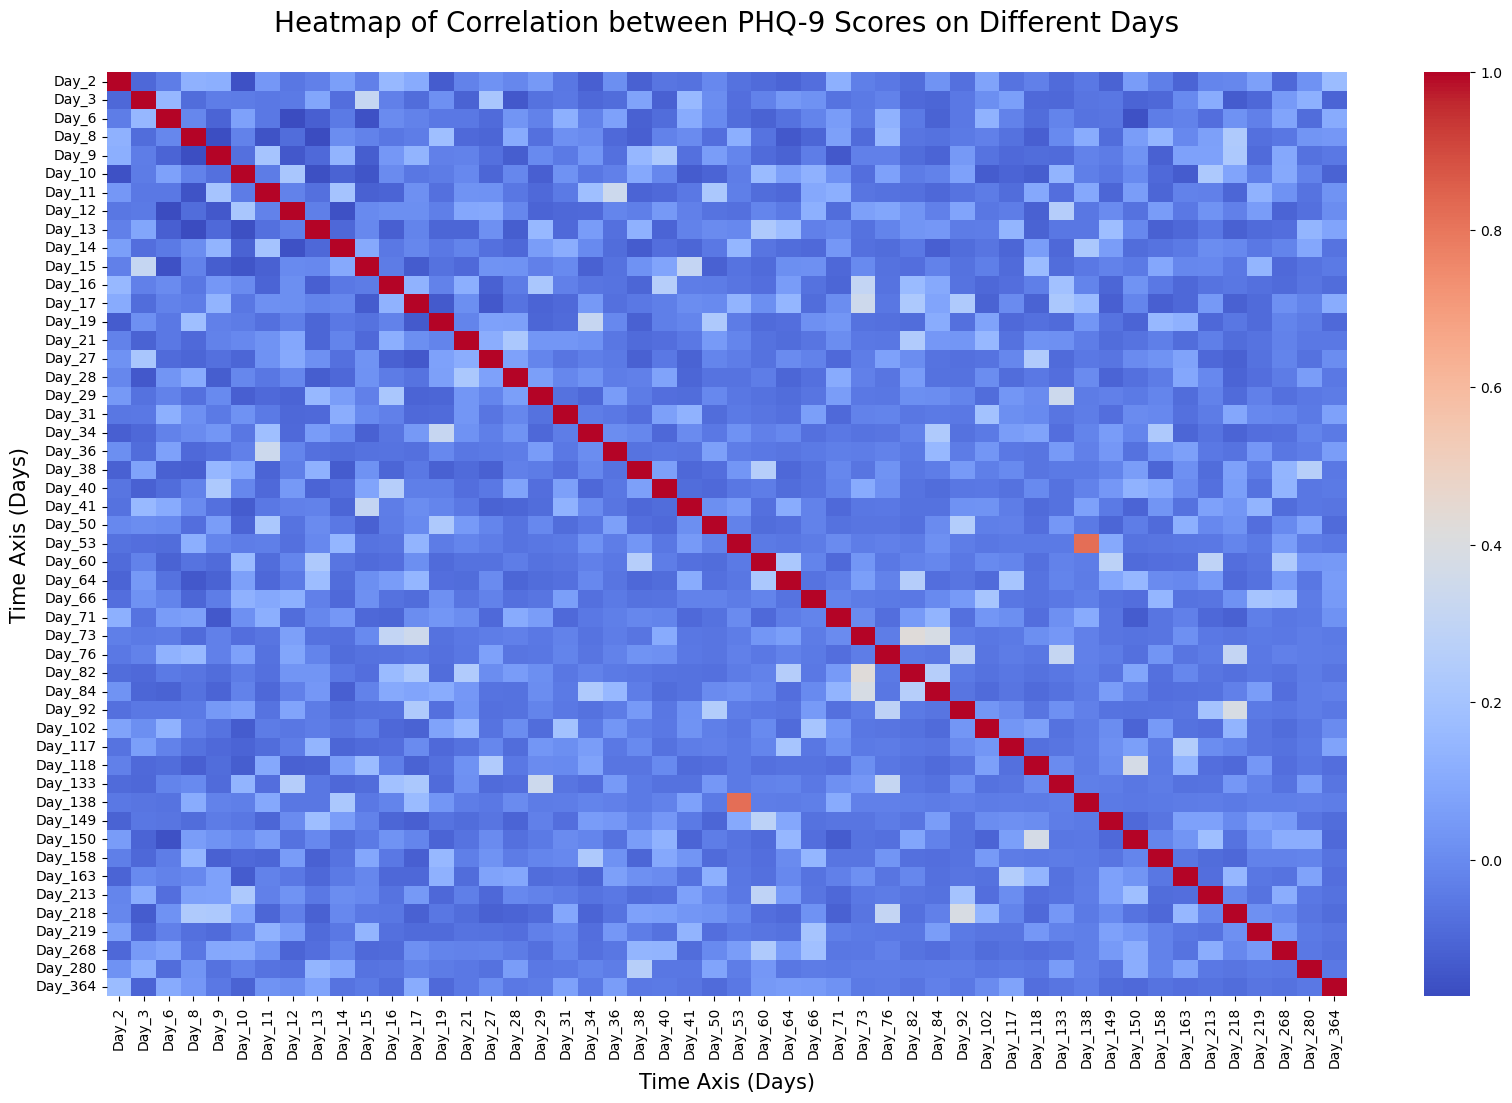

In [12]:
# Caculate the matrix Correlation of the sample data
correlation_matrix = data.fillna(value=-1).corr()

# Create the Heatmap
plt.figure(figsize = (20, 12))

sns.heatmap(data  = correlation_matrix,
            annot = False,
            cmap  = 'coolwarm', 
            fmt   = '.2f')

# Decorators 
plt.xlabel(xlabel   = 'Time Axis (Days)',
           fontsize = 15)

plt.ylabel(ylabel   = 'Time Axis (Days)',
           fontsize = 15)

plt.title(label    = 'Heatmap of Correlation between PHQ-9 Scores on Different Days\n',
          fontsize = 20)

plt.show()


- From the above plot of correlation matrix or heatmap, i.e the correlation between the PHQ-9 scores across all the patients for different days, it could be clearly inferred that there is not much correlation between the days. Which indicates that the PHQ-9 scores of the patients on different days' exhibits different pattern or different distribution, which are not statistically or mathematically correlated to a significant extent. 


- Only for two times some significant correlation have been found : 

> 1) Day-138 is highly correlated with Day-53

> 2) Day-50 is highly correlated with Day-138
                     


## Change Point Detection

### 1) Model Description :
---------------------------

***To achieve the goal and detect the change points the following steps have been followed:***

- 1) First an aggregated measure called the coefficient of variation (CV) has been  calculated for each day's scores.*** 

> The coefficient of variation (CV) is a statistical measure that quantifies the relative variability of a dataset compared to its mean. It is calculated by dividing the Standard Deviation of the data by its Mean.
    
> A higher CV value suggests greater variation or fluctuations in the scores relative to their Mean; while lower CV values indicate less variation.
    
    
- 2) The next step is to perform change point detection on the CV values. Change point detection is a technique that helps identify points in the data where there are significant shifts or changes in the underlying patterns or distribution.

> Here, the Lasso model has been used for change point detection, which is based on a specific algorithm called the Pelt algorithm. 
    
> The Pelt algorithm is a dynamic programming algorithm that efficiently finds the optimal segmentation of the data based on a cost function. It searches for change points that minimize the cost associated with the shifts in the score distribution patterns. 
    
> The 'l1' model, also known as the L1-norm or least absolute deviations (LAD) model, is a widely used approach in change point detection has been used here, which refers to the L1-Pelt algorithm. The L1 regularization, also known as Lasso regularization, is applied within the Pelt algorithm to encourage sparsity and promote simpler segmentations by driving some change points exactly to zero.
   
   
- 3) The Pelt algorithm analyzes the CV values and detects change points. The cost function takes into account the CV values and penalty parameter, which controls the trade-off between detecting more change points or having a simpler segmentation.


- 4) Once the change points are detected, the data could be segregated based on these change points. Each segment represents a subset of the data with similar score distribution patterns over time.


--------------------------------------------------------------

- [x] By applying change point detection on the CV values, the model is able to identify change points where there are abrupt shifts in the variability of scores. These change points indicate distinct periods with different score distribution patterns.


- [x] In summary, the model leverages change point detection and the coefficient of variation to identify segments in the PHQ-9 score data where there are significant changes in distribution patterns. This approach provides insights into the temporal patterns of the scores, enabling a better understanding of the variations and trends in the data.


### 2) Mathematical Background :
-----------------------------------

> a) The L1-norm or LAD is a mathematical measure of the absolute differences between the observed data and an estimated model. It is defined as the sum of the absolute values of the residuals (differences between the observed data and the estimated values).


> b) In the context of change point detection, the L1-norm is used to quantify the dissimilarity between consecutive segments of data. The objective is to identify points where the dissimilarity or discrepancy significantly changes, indicating a potential change point.


> c) The L1-norm is employed in change point detection algorithms, such as the Pelt algorithm. The Pelt algorithm minimizes a cost function that balances the number of change points and the goodness of fit to the data.


> d) By using the L1-norm, the "l1" model emphasizes the importance of the absolute differences between consecutive segments. It is particularly useful when dealing with data that may contain outliers or when the underlying distribution is not assumed to be Gaussian.


> e) The "l1" model is robust to outliers because it focuses on the median (L1-norm minimizer) rather than the mean (L2-norm minimizer). It can handle heavy-tailed or skewed distributions, as the L1-norm is less influenced by extreme values.


### Model Building for Change Point Detection By Pruned Exact Linear Time (PELT) algorithm along with Least Absolute Shrinkage And Selection Operator (LASSO) loss normalization
-------------------------------------------------------------------------------------------------------------------


- The PELT (Pruned Exact Linear Time) algorithm is a change point detection method designed to efficiently find the  optimal change points in time series data. It is a variant of the dynamic programming-based optimal segmentation algorithm. 

- PELT is particularly useful when dealing with large datasets, as it provides a computationally efficient way to identify change points with minimal memory usage.



### PELT Algorithm :
----------------------

- [x] **Notation:**

> 1) Let's assume we have a univariate time series of aggregated daily PHQ-9 scores (which is Coefficient of Variation in our case) represented by X = [x_1, x_2, ..., x_n], where n = total number of days for which we have PHQ-9 scores data.


> 2) The PHQ-9 scores for different patients are represented in columns, and the days are represented in rows of a pandas DataFrame input_data.


- [x] **Cost Function:**

> 1) The cost function cost(i, j) measures how well a segment between time indices i and j can represent the data. It evaluates the discrepancy between the observed data and the model used to represent the segment.


> 2) The goal is to find the set of change points C that minimizes the overall cost of all segments.


- [x] ***Dynamic Programming:***

- PELT uses dynamic programming to efficiently find the optimal set of change points.

> 1) Let OPT(j) be the minimum cost achievable for the first j elements of the time series, including a possible change point at j.


> 2) To calculate OPT(j), we need to consider all possible candidates for the last change point before index j. Let's say i is the candidate change point. Then OPT(j) can be recursively defined as:

                      OPT(j) = min{cost(i, j) + penalty + OPT(i)}, for all i from 0 to j-1


> 3) The above equation essentially says that OPT(j) is the minimum of the cost of the segment between i and j plus the penalty for having a change point at j, plus the optimal cost up to i.


- [x] ***Pruning:***

> 1) PELT efficiently prunes the search space by considering only candidate change points that are relevant and lead to a better overall cost.


> 2) During the dynamic programming process, if we find that cost(i, j) + penalty + OPT(i) is greater than the current minimum cost found so far (denoted as current_min_cost), we can safely skip this candidate i, as it won't lead to a better solution.


- [x] ***Penalty:***

- The penalty is an important hyperparameter in the PELT algorithm, denoted as penalty.

> 1) It is used to control the number of change points detected. A higher penalty value leads to fewer change points, and a lower penalty value leads to more change points.


> 2) The penalty term helps balance the trade-off between detecting too many change points (overfitting) and detecting too few (underfitting).


- [x] ***Output:***

> The output of the PELT algorithm is the set of change points C, which represents the time indices where the algorithm detects significant shifts in the data distribution. These change points define the boundaries of segments with relatively homogeneous data patterns.




In [13]:
def shiftDetectionInPHQ9Scores(input_data:pd.DataFrame, min_points:int=2, jump:int=1, penalty:float=0.5) -> tuple:
    """
    Segregates the input DataFrame along the time axis based on change points detected in the 
    coefficient of variation (CV) values of the daily PHQ-9 Scores 

    Arguments:
    -----------
        input_data {DataFrame} : A pandas DataFrame containing the PHQ-9 scores, where rows represent
                                 patients, and columns represent days
                                 
        min_points    {int}    : An integer, which is adjustable deciding factor for minimum number of
                                 points to include for forming a cluster
                                 Default = 2
                                 
        jump          {int}    : An integer, which is adjustable deciding factor for subsampling the 
                                 the given sample
                                 Default = 1
                                
        penalty      {float}   : A float, which is the adjustable penalty hyper-parameter, that would
                                 be used in the regularization 
                                 Default = 0.5

    Errors:
    --------
        ValueError             : Error occurs if the input arguments are not of their defined data types
                                 
        SegregationError       : Error occurs if any exception happens at any step while performing the data
                                 seggregation process based on PELT change point detection algorithm
        
    Returns:
    ---------
              {tuple}          : A python tuple which contains the following three items :
                                 
                                 - sections           : List of DataFrames representing segments of the input 
                                                        data, each containing similar types of score 
                                                        distributions
                                  
                                 - shift_points       : List of the break points / change points indices of 
                                                        the dataset
                                                  
                                 - cluster_boundaries : Dictionary containing keys as cluster number and values
                                                        as another sub-dictionary which contains the starting 
                                                        and ending day of that corresponding cluster
    """
    # Input type checking
    if (not isinstance(input_data, pd.DataFrame)):
        return repr(ValueError(f'Expected a pandas DataFrame for the argument : input_data, \
                                 got : {type(input_data)} instead')).replace('  ', '')
    
    if (not isinstance(min_points, int)):
        return repr(ValueError(f'Expected an integer for the argument : min_points, got : \
                                 {type(min_points)} instead')).replace('  ', '')
    
    if (not isinstance(jump, int)):
        return repr(ValueError(f'Expected an integer for the argument : jump, got : {type(jump)}\
                                 instead')).replace('  ', '')
    
    if (not isinstance(penalty, float)):
        return repr(ValueError(f'Expected a float for the argument : penalty, got : {type(penalty)}\
                                 instead')).replace('  ', '')

    try:
        # Calculate the coefficient of variation (CV) for each day's scores (all patients)
        mean_values       = input_data.apply(lambda x: np.nanmean(x), axis=0)
        std_values        = input_data.apply(lambda y: np.nanstd(y), axis=0)
        cv_values         = (std_values / mean_values)

        # Perform change point detection on the CV values
        model             = "l1"  # L1 Regularization / Lasso Regularization Model has been used here
        
        cost_function     = rpt.costs.CostL1 # The cost function, by minimizing which change points would be detected
        
        algorithm         = rpt.Pelt(model       = model, 
                                     custom_cost = cost_function,
                                     min_size    = min_points,
                                     jump        = jump).fit(cv_values.values)
        
        shift_points      = algorithm.predict(pen = penalty)  # pen / penalty is an hyperparameter here

        # Segregate the time axis based on the change points
        sections           = list()
        cluster_boundaries = dict()
        prev_shift_point   = 0
        
        for shift_point in shift_points:
            section           = input_data.iloc[:, prev_shift_point : shift_point]
            sections.append(section)
            cluster_boundaries.update({f'Cluster-{shift_points.index(shift_point)+1}' : {'Start' : section.T.index[0],
                                                                                         'End'   : section.T.index[-1]}})
            prev_shift_point  = shift_point
            
        
        # Add the last section from the last change point to the end
        section = input_data.iloc[:, prev_shift_point:]
        if (len(section.T) != 0):
            sections.append(section)
        else:
            pass
        
        return sections, shift_points, cluster_boundaries
    except Exception as SegregationError:
        raise
        return repr(f"SegregationError : Got : {SegregationError} while segregating PHQ-9 scores\
                      by change points").replace('  ', '')


- Given the sample dataset above, for detecting the change points in the timeseries of daily Coefficient of Variation (calculated across all 100 patients), for sample 50 days PHQ-9 scores, the following 3 conditions have been applied on the PELT algorithm:

> 1) For forming a group/cluster, at least 2 points has to be considered (min_points = 2).

> 2) For searching change points, every point should be considered as potential change point at the begining (jump = 1).

> 3) For controlling the sensitivity of the detection, the penalty parameter has been set at the 0.5, which is the mid point of the range of the penatly parameter (penalty can take any values within 0 to 1).


- Applying these 3 constraints along with the PELT algorithm, the following results have been obtained :

In [14]:
# Change Point Detection
segregated_data, detected_shift_points, cluster_boundaries = shiftDetectionInPHQ9Scores(input_data = data,
                                                                                        min_points = 2,
                                                                                        jump       = 1,
                                                                                        penalty    = 0.5)

In [15]:
print ('\t\tThe day indices where the PHQ-9 scores changes its underlying distribution patterns:\n')
print (f'\t\t\t\t\t {detected_shift_points}')

		The day indices where the PHQ-9 scores changes its underlying distribution patterns:

					 [6, 14, 27, 30, 34, 50]


In [16]:
print ('\t\t\tThe Staring & Ending day of each detected clusters are as follows:\n')
for key, value in cluster_boundaries.items():
    print(f'\t\t\t\t {key} : {value}')
    print('\n')

			The Staring & Ending day of each detected clusters are as follows:

				 Cluster-1 : {'Start': 'Day_2', 'End': 'Day_10'}


				 Cluster-2 : {'Start': 'Day_11', 'End': 'Day_19'}


				 Cluster-3 : {'Start': 'Day_21', 'End': 'Day_60'}


				 Cluster-4 : {'Start': 'Day_64', 'End': 'Day_71'}


				 Cluster-5 : {'Start': 'Day_73', 'End': 'Day_84'}


				 Cluster-6 : {'Start': 'Day_92', 'End': 'Day_364'}




In [17]:
for index, section in enumerate(segregated_data):
    print (f'\t\t\t\t\t\t\tSection : {index + 1}\n')
    display (section.T)

							Section : 1



,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_91,Patient_92,Patient_93,Patient_94,Patient_95,Patient_96,Patient_97,Patient_98,Patient_99,Patient_100
Day,,,,,,,,,,,,,,,,,,,,,
Day_2,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_3,19.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,17.0
Day_6,NaN,16.0,NaN,NaN,NaN,13.0,12.0,NaN,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_8,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_9,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
Day_10,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,19.0,NaN,...,NaN,NaN,14.0,15.0,NaN,NaN,18.0,NaN,NaN,NaN


							Section : 2



,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_91,Patient_92,Patient_93,Patient_94,Patient_95,Patient_96,Patient_97,Patient_98,Patient_99,Patient_100
Day,,,,,,,,,,,,,,,,,,,,,
Day_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
Day_12,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,NaN,9.0,NaN,NaN,NaN
Day_13,12.0,NaN,NaN,NaN,5.0,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Day_15,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_17,NaN,NaN,NaN,10.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
Day_19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN


							Section : 3



,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_91,Patient_92,Patient_93,Patient_94,Patient_95,Patient_96,Patient_97,Patient_98,Patient_99,Patient_100
Day,,,,,,,,,,,,,,,,,,,,,
Day_21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_28,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Day_29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_34,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN
Day_36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Day_40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


							Section : 4



,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_91,Patient_92,Patient_93,Patient_94,Patient_95,Patient_96,Patient_97,Patient_98,Patient_99,Patient_100
Day,,,,,,,,,,,,,,,,,,,,,
Day_64,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,NaN
Day_66,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_71,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


							Section : 5



,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_91,Patient_92,Patient_93,Patient_94,Patient_95,Patient_96,Patient_97,Patient_98,Patient_99,Patient_100
Day,,,,,,,,,,,,,,,,,,,,,
Day_73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_76,NaN,NaN,NaN,0.0,NaN,0.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,NaN
Day_82,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


							Section : 6



,Patient_1,Patient_2,Patient_3,Patient_4,Patient_5,Patient_6,Patient_7,Patient_8,Patient_9,Patient_10,...,Patient_91,Patient_92,Patient_93,Patient_94,Patient_95,Patient_96,Patient_97,Patient_98,Patient_99,Patient_100
Day,,,,,,,,,,,,,,,,,,,,,
Day_92,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Day_102,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
Day_117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,5.0,NaN,NaN
Day_118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_133,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Day_138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Day_149,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN
Day_150,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0
Day_158,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


### Visualize the Detected Breakpoint along with Scatter Plot of Raw dataset, Smoothed Trend Line


After detecting the change points using the algorithm, let's visualize the clusters and their goodness of fit on the raw dataset. Different clusters have been marked with different color patches and the raw data belonging in each of them have been plotted as Brown dots in scatter plot. 

Also, for visualizing the **Smoothen Trend** of PHQ-9 scores along the time axis, let's calculate the Moving Average with a window size of 10, on the timeseries obtained from the raw dataset by calculating daily Coefficient of Variations. The smoothen trend line has been plotted by a Red Line, with the values spotted by markers.  


In [18]:
def visualizeSeggregatedData(input_data:pd.DataFrame, shift_points:list) -> None:
    """
    Visualizes the seggregated data with scatter points and smoothed trend lines with shift points highlighted
    by vertical color patches

    Arguments:
    ----------
        input_data     {DataFrame}   : List of pandas DataFrames representing the segregated data
                                       segments
        
        shift_points      {list}     : A list of the indices of the input_data, where the shift in
                                       the underlying distribution have been occured
        
    Errors:
    -------
        ValueError                   : Error occurs if any of the input argument is not of its defined
                                       data type
        
        SeggregatedDataPlottingError : Error occurs if any exception happens at any step while plotting 
                                       the Seggregated data, along with raw points in a scatter digram
                                       and color patches
                                      
    Returns:
    --------
                   {None}            : A None type object
    """
    # Input type checking
    if (not isinstance(input_data, pd.DataFrame)):
        return repr(ValueError(f'Expected a pandas DataFrame for the argument : input_data, got : \
                                 {type(input_data)} instead')).replace('  ', '')
    
    if (not isinstance(shift_points, list)):
        return repr(ValueError(f'Expected a python list for the argument : shift_points, got :\
                                 {type(shift_points)} instead')).replace('  ', '')
    
    try:
        # Prepare scatter plot data
        x_axis_values          = np.arange(len(input_data.columns))  # Time axis / X-Axis
        y_axis_values          = input_data.values                   # PHQ-9 scores / Y-Axis

        # Daily Average PHQ-9 Scores of 100 observed patients
        daily_average          = input_data.mean(axis   = 0, 
                                                 skipna = True)
        # Smooth the daily average using a moving average with window size = 10
        window_size            = 10
        smoothed_daily_average = daily_average.rolling(window      = window_size,
                                                       min_periods = window_size,
                                                       center      = True,
                                                       win_type    = None, 
                                                       axis        = 0,
                                                       closed      = 'both',
                                                       method      = 'single').mean()

        # Visualize the segments with proper boundaries
        fig, ax                = plt.subplots(figsize=(20, 12))

        # Plot the PHQ-9 scores as scatter points
        for i, y_axis_value in enumerate(y_axis_values):
            ax.scatter(x_axis_values, 
                       y_axis_value, 
                       color = 'brown', 
                       alpha = 0.7)
            
        # Plot the smoothed trend line
        ax.plot(x_axis_values,
                smoothed_daily_average,
                scalex     = True, 
                scaley     = True,
                color      = 'red',
                marker     = '^',
                markersize = 8.0,
                linestyle  = '-',
                linewidth  = 2.0, 
                label      = 'Smoothed Daily Average')


        # Highlight the boundaries as vertical lines with different colors
        boundaries     = np.concatenate([[0], shift_points, [len(input_data.columns)]])
        num_boundaries = len(boundaries) - 2

        # Make a color map with the desired number of colors
        colors         = plt.cm.get_cmap('tab20', num_boundaries) # Change colors as desired
        colors         = [colors(i) for i in range(num_boundaries)]  
        
        for i in range(num_boundaries):
            lower_boundary = boundaries[i] - 0.075
            upper_boundary = boundaries[i+1] - 0.075
            
            ax.axvspan(lower_boundary, 
                       upper_boundary, 
                       facecolor = colors[i], 
                       alpha     = 0.25,
                       label     = f'Section - {i+1}')

        # Set labels and title
        ax.set_xlabel(xlabel   = 'Survey Day (Time)', 
                      fontsize = 15)
        
        ax.set_ylabel(ylabel   = 'Daily PHQ-9 Scores', 
                      fontsize = 15)
        
        ax.set_title(label    = 'Scatter Plot of PHQ-9 scores With Corresponding Segments According To Underlying Pattern\n', 
                     fontsize = 25)

        # Adjust x-axis tick labels
        plt.xticks(ticks    = range(len(input_data.columns)), 
                   labels   = input_data.columns,
                   rotation = 90)
        
        # Adjust y-axis tick labels
        plt.yticks(ticks    = range(0, 29), 
                   labels   = range(0, 29),
                   rotation = 0)

        # Display the plot
        plt.tight_layout(pad   = 2.0,
                         h_pad = 1.0,
                         w_pad = 1.0)
        
        ax.legend(bbox_to_anchor = (1.00, 1.00),
                  loc            = 'upper left',
                  prop           = {'size': 12})
        
        #plt.savefig('../plots/change_points_detection_plot.png', bbox_inches='tight')
        
        plt.show()
        
    except Exception as SegregatedDataPlottingError:
        return repr(f'SegregatedDataPlottingError : Got the error : {SegregatedDataPlottingError} \
                      while plotting the seggregated data along with raw data points in a scatter \
                      plot').replace('  ', '')


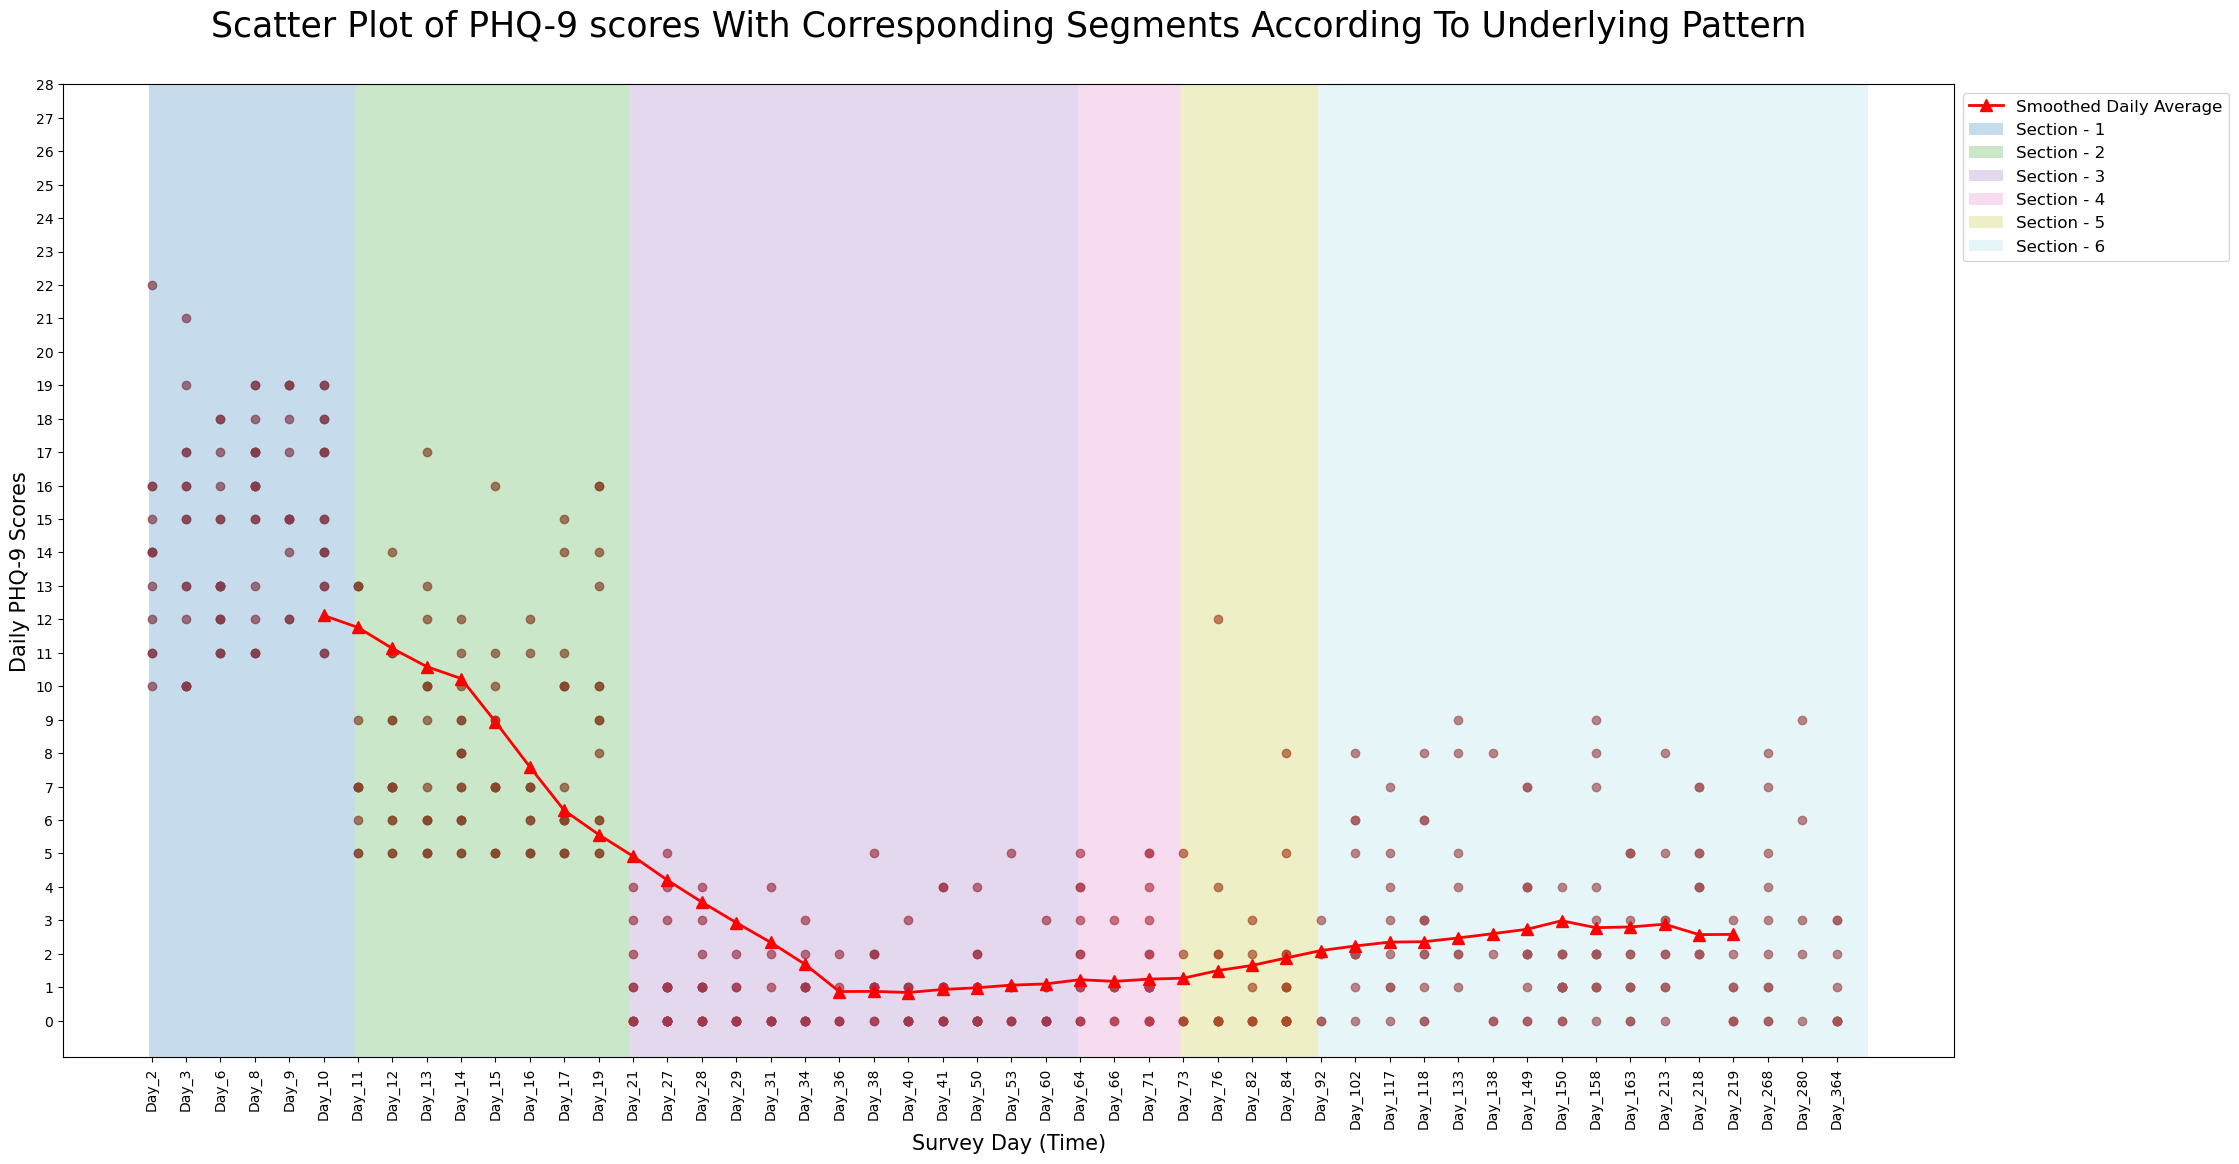

In [19]:
# Visualization
visualizeSeggregatedData(input_data   = data,
                         shift_points = detected_shift_points)

### Validation : Goodness of Fit of the Clusters
--------------------------------------------------

- For checking, if all the contraints that have been set for the PELT algorithm and the application of it on the timeseries of daily Coefficient of Variations (CV) across all the patients; have been satisfied and how good they have been able to cluster the time-axis based on the raw sparse matrix of PHQ-9 scores of 100 patients for 50 discrete days, lets plot the change points as vertical dotted lines of red color and along y-axis plot the daily CV scores of 100 patients and along x-axis plot the 50 discrete days for which data has been delivered. 

In [ ]:
# Plotting for Validation

# 1. Calculate the Coefficient of Variation across all patients for each day in a pandas series 
coefficient_of_variations      = data.apply(lambda z: np.nanstd(z) / np.nanmean(z), axis=0)

# 2. Calculate the change points using the above function
segregated_data, change_points, boundaries_dict = shiftDetectionInPHQ9Scores(input_data = data,
                                                                             min_points = 2,
                                                                             jump       = 1,
                                                                             penalty    = 0.5)

# Let's plot the daily CV values through a timeseries plot, on which cluster boundaries will be plotted
# as red vertical lines to check how precisely and correctly the clustering has been done by PELT algorithm

plt.figure(figsize=(16, 8))

plt.plot(coefficient_of_variations.index, 
         coefficient_of_variations.values,
         label    = 'Coefficient of Variation (CV)',
         c        = 'purple', 
         marker   = '*')

# Highlight the detected change points with red vertical lines
for change_point in change_points[:-1]:
    plt.axvline(x         = coefficient_of_variations.index[change_point-1], 
                color     = 'red', 
                linestyle = '--',
                alpha     = 1, 
                label     = f'Change Point - {change_points.index(change_point)+1}')

for index, coefficient_of_variation in enumerate(coefficient_of_variations):
    plt.text(x        = index, 
             y        = coefficient_of_variation+0.15 ,
             s        = f'{coefficient_of_variation:.3f}',
             fontsize = 10,
             ha       = 'center',
             va       = 'bottom',
             color    = 'black', 
             rotation = 90)   

    
plt.xlabel(xlabel   = 'Day',
           fontsize = 15)

plt.ylabel(ylabel   = 'Coefficient of Variation',
           fontsize = 15)

plt.xticks(rotation = 90)

plt.yticks(ticks  = np.arange(0, 3, 0.25),
           labels = np.arange(0, 3, 0.25))

plt.title(label    = 'Daily Coefficient of Variation (CV) Over Time\n',
          fontsize = 20)

plt.legend(bbox_to_anchor = (1.00, 1.00),
           loc            = 'upper left',
           prop           = {'size': 10})

plt.grid(True)
#plt.savefig('../plots/validation_plot.png', bbox_inches='tight')
plt.show()


### Cluster by Cluster Validation Checking with Visualization :
---------------------------------------------------------------

***Using the PELT algorithm with Lasso Normalization Cost Function, 5 change points have been detected and in the above plot those change points have been plotted as vertical dotted red lines along with the line plot of Daily Coefficient of Variations across all patients. For getting a more clearer understanding, the CV values have been plotted as texts with their corresponding y-axis.*** 

- From the above plot, following things could be seen clearly :


> 1) From Day-2 to Day-10, the values are exhibiting the properties :
  >> min  = 0.154, 
  >> max  = 0.237,
  >> mean = 0.185,
  >> SD   = 0.034
                                                                    
  >> - [x] It could be seen that the values are clustering around the mean and varying within a small range. 
                                                                        
> 2) After Day-10, there's a shift in the CV value at Day-11 and the values after Day-11 upto Day-19, exhibiting the same pattern as well : 
  >> min   = 0.261,
  >> max   = 0.402,
  >> mean  = 0.348,
  >> SD    = 0.049
                       
  >> - [x] Here also, it could be seen that within this interval, the values are clustering around the mean with a small amount of dispersion.
    
  >> - [x] Also, the mean and SD of the two clusters have significant differences. 
   
  >> - So, it could be inferred that, the clusters are well separated by the algorithm.
    
    
> 3) After Day-19, from Day-21 upto Day-60, there is another cluster found by the algorithm. Within this interval of time, the points are distributed with the following characteristics: 
  >> min  = 0.385,
  >> max  = 1.690,
  >> mean = 1.304,
  >> SD   = 0.338
                                                                                                
  >> - [x] At this cluster, the within cluster Variance is higher that previous two clusters, there's a significant shift in the average of the CV values; also they are lying within a bigger range of dispersion. 
   
   
  >> - [x] It could be also seen that, at Day-38, there's a huge drop in the CV value. But after that next values are clustering around the mean of the cluster values. Which is the reason this point has not been considered as a change point. Because, if algorithm mark it as a change point, then the next point i.e. Day-40 would again be a change point due to a huge pick in the mangnitude. As a constraint of **min_points = 2**  has been employed, solely the Day-38 cannot form a separate cluster. Which gives the proof of satisfying the **minimum point for forming a cluster**.
   
   
> 4) On the Day-64, there's a huge drop-off in the magnitude in the CV value and that continues upto Day-71, after which again a pick at the CV values could be seen from the line plot of CV; which indicates a separate cluster formed with the 3 points: Day-64, Day-66 and Day-71. The algorithm has been able to detect this change in the CV values as well and formed a separate cluster with these 3 points. This cluster is exhibiting the following properties : 
  >> min  = 0.853,
  >> max  = 1.000,
  >> mean = 0.943,
  >> SD   = 0.079
                                                         
  >> - Which gives a clear picture why these points are belonging to same cluster : the values of the cluster are always lying around the mean & within cluster variation is smaller. 
   
   
> 5) After that again on Day-73, there's a huge jump in the values of CV, from 0.975 to 1.597. The algorithm has been able to detect this change and hence formed a new cluster taking the Day-73 to Day-84 as they are exhibiting the same kind of properties : 
  >> min  = 1.312,
  >> max  = 1.789,
  >> mean = 1.589,
  >> SD   = 0.201
                     
  >> - [x] From the above properties and values of the points, it's clearly visible that out of 4 points of the cluster, 3 are clustering around the mean value, whereas the CV on the Day-82 is showing a drop-off. But as per the ***minimum point for forming a cluster*** constraint is not allowing the algorithm to form a different cluster rather include it within the cluster in which the previous and next points are exhibiting same kind of properties. Which is also a proof the ***sensitivity/penalty*** of the model is midium : that means the algorithm would declare a point as a change point only when there's a moderate yet significant change in the values. 
   
   
> 6) Finally, from Day-92 to Day-364, these points are forming another separate cluster, with the following properties :
  >> min  = 0.423,
  >> max  = 1.311,
  >> mean = 0.848,
  >> SD   = 0.214
   
  >> - [x] Agian within this cluster, two sudden drop-off and pick-up points have been found :  Pick at Day-138 and Drop at Day-218. But, again maintaining the ***minimum point for forming a cluster*** constraint, the algorithm has not considered these suddent pick-up or drop-off points as change points, rather checked if the next points are exhibiting the same kind of distribution just previous that sudden change point or not. If yes, it has forcefully put that sudden change point within the cluster, where previous and next points are showing same kind of distibutional properties. 
   

### Conclusion :
------------------

- From the above plot, it has been found that all the 3 constraints have been followed by the algorithm :*** 

> a) The minimum number of points belonging in a cluster > 2.


> b) For searching the potential change points, all the points have been considered and checked. 
    
> c) The sensitivity condition that has been set at the medium = 0.5, has been maintained too and hence the number of clusters are not too much(Over fitting), neither too less (Underfitting). Rather the algorithm has only detected a chnage point if there is a statistically significant change within the distribution of the CV, hence the PHQ-9 scores as well (As CV is only the aggregated / summarized values of the PHQ-9 scores).
    
    
***So, finally after all the analysis and model fitting through the calculations and visualizations, we got 6 Clusters, i.e. there are 6 different sections of the PHQ-9 scores across all the 100 patients, which are significantly different from each other along the x-axis (Days); which means the sample PHQ-9 scores of the 100 patients within the 50 sample discrete days are showing different inherent/underlying distributions of scores over the time, which shows a clear picture of the effect of treatments by a particular clinic/organization on these group of patients in their Depression Levels from their admission for the treatment to recovery period upto 1 year.***